In [145]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [221]:
from google.colab import files

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [4]:
def plot_silhouette(X, n_clusters, random_state = 0):
    for n in n_clusters:
        kmeans_ = KMeans(n_clusters = n, random_state = random_state)
        preds_ = kmeans_.fit_predict(X)

        # Se calcula el coeficiente de silueta general
        silhouette_avg = silhouette_score(X, preds_)
        print('For n_clusters =', n, ', the average silhouette score is :', silhouette_avg )

        # Se calcula el coeficiente de silueta para cada instancia
        sample_silhouette_values = silhouette_samples(X, preds_)

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n + 1) * 10])

        y_lower = 10
        for i in range(n):
            ith_cluster_silhouette_values = sample_silhouette_values[preds_ == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title('The silhouette plot for the various clusters')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Cluster label')
        ax1.axvline(x=silhouette_avg, color = 'red', linestyle = '--')
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(preds_.astype(float) / n)
        ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7, c = colors, edgecolor = 'k')

        centers = kmeans_.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o', c = 'white', alpha = 1, s = 200, edgecolor = 'k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

        ax2.set_title('The visualization of the clustered data')
        ax2.set_xlabel('Feature space for the 1st feature')
        ax2.set_ylabel('Feature space for the 2nd feature')

        plt.suptitle('Silhouette analysis for KMeans clustering on sample data with n_clusters = %d' % n, fontsize = 14, fontweight = 'bold')

    plt.show()

In [42]:
raw_data = pd.read_csv('./drive/MyDrive/datos_programa_canguro.csv',index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,5,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,105,107,111,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,146,148,149,150,151,152,153,154,155,156,157,158,159,160,168,169,170,171,172,173,174,175,176,177,178,179,180,182,184,186,191,193,194,195,197,199,201,202,203,206,207,208,209,211,218,219,220,221,222,223,224,225,227,237,239,242,244,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,281,291,296,316,319,325,342,345,355,359,360,361,362,363,366,371,380,392,396,399,409,413,417,420,425,438,444,450,454,457,467,471,475,478,483,492,504,508,511,52

In [200]:
raw_data.head()

,Code,Iden_Codigo,Iden_Sede,Iden_embarazoMultiple,Iden_EstadoHC,Iden_FechaParto,CSP_CiudadProcedencia,CSP_SituaPareja,CSP_TipoVivienda,CSP_EscolaridadMadre,CSP_SituacionLaboralMadre,CSP_FechaNacimientoMadre,CSP_EscolaridadPadre,CSP_SituacionLaboralPadre,CSP_IngresoMensual,CSP_DistanciaVivienda,CSP_numPersVivenIngMen,CSP_Menores5vivenMadre,CSP_NutricionFam,CSP_EmbarazoDeseado,CSP_MesTabajoEmba,CSP_AyudaPerm1mes,CSP_OtrasObservaciones,CP_PesoMadre,CP_TallaMadre,CP_PesoPadre,CP_TallaPadre,CP_Gestacion,CP_Paridad,CP_PartoCesarea,CP_Ectopico,CP_NacidoVivo,CP_Prematuro,CP_Mortinato,CP_TotalCPN,CP_ARO,CP_EnfermeraJefe,CP_MedGeneral,CP_Hormonales,CP_DIU,CP_MesInicCP,CP_SA_Sangrado,CP_SA_InfUrinaria,CP_SA_InfGineco,CP_SA_Anemia,CP_SA_EnfRespiratoria,CP_SA_RPM,CP_SA_APP,CP_SA_Preclampsia,CP_EstuvoHosp,CP_HospitalizacionesPreParto,CP_rhMadre,CP_MadreAlcohol,CP_MadreDrogas,CP_MadreFumo,CP_HospitalizacionEmbarazoAccidentes,CP_HospitalizacionEmbarazoAnemia,CP_HospitalizacionEmbarazoEnfermedadRespiratoria,CP_HospitalizacionEmbarazoAPP,CP_HospitalizacionEmbarazoPreeclampsia,CP_HospitalizacionEmbarazoEclampsia,CP_HospitalizacionEmbarazoInfeccionGinecologica,CP_HospitalizacionEmbarazoInfeccionUrinaria,CP_HospitalizacionEmbarazoSangrado,CP_TP_Orina,CP_TP_Rubeola,CP_TP_Toxoplasmosis,CP_TP_Sifilis,CP_TP_HIV,CP_TP_HepatitisB,CP_Medicamentos,CP_NumEcografias,CP_EcoPrimerTrimestre,CP_edadmaterna,PA_LugarNacimiento,PA_DuracionRPM,PA_AtendioParto,PA_DuracionTraParto,PA_TipoParto,PA_PresentacionNino,PA_MovimientoDisminuido,PA_SufrimientoFetalAgudo,PA_LiqAmnioticoMeconiado,PA_RitmoCardiaco,PA_Monitoreo,SFA,PA_NumDosisCorticoides,PA_ComplicacionsPartoPlacentaPrevia,PA_ComplicacionsPartoAbrupcio,PA_ComplicacionsPartoMultiples,PA_ComplicacionsPartoPatologIaCordOn,PA_ComplicacionsPartoPreeclampsia,PA_ComplicacionsPartoEclampsia,PA_ComplicacionsPartoAmnionitis,PA_ComplicacionsPartoSindromedehellp,PA_DiasHospiMadre,PA_DiasUCIMadre,PA_EstActualMadre,ERN_AdaptNeonatal,ERN_Peso,ERN_Talla,ERN_Sexo,ERN_PC,ERN_FUM,ERN_Ballard,ERN_Eco,ERN_LubchencoFenton,ERN_A_1min,ERN_A_5min,ERN_A_10min,ERN_Remision,HD_FechaEntrada,HD_FechaSalida,HD_DiasVenMecanica,HD_DiasVenNoInvasiva,HD_DiasOxigeno,HD_DiasCanulaNasa,HD_DiasFototerapia,HD_DiasCamaraCefalica,HD_DiasIncubadora,HD_DiasAlimentacionPar,HD_DiasUCI,HD_DiasURN,HD_DiasAlojamiento,HD_TotalDiasHospital,HD_ExamenesEcografiacerebral,HD_ExamenesEcocardiograma,,HD_ExamenesRubeola,HD_ExamenesToxoplasmosis,HD_ExamenesSifilis,HD_ExamenesHIV,HD_ExamenesHepatitisB,HD_ExamenesGenetico,HD_ExamenesRMICerebral,HD_ExamenesTSH_Tiroides,HD_DosisSurfactante,HD_CicloAntibio,HD_DosisAmino,HD_CiclosUltimaLinea,HD_CiclosOtroAntibio,HD_SosInfec,HD_RhNino,HD_NumTrasSanguineas,HD_FechaUltimaTrans,HD_UltiValorHematocrito,HD_UltimValorHemaglobina,HD_ValorMasAltoBilirubina,HD_C_HemorragiaIntra,HD_C_Hipoglicemia,HD_C_Apnea,HD_C_Ictericia,HD_C_ExamenNeurologico,HD_C_Convulsiones,HD_C_DisplasiaBronco,HD_C_OxigenoDependencia,HD_PesoSalida,HD_TipoAlimentacionS,AC_LugarAC,AC_DiasPosCanguro,AC_MaxHorasLogroCargar,AC_UCI_PesEntrada,AC_UCI_PesSalida,AC_URN_PesEntrada,AC_URN_PesSalida,AC_AlojCon_PesEntrada,AC_AlojCon_PesSalida,AC_AdapSeno,AC_ExtraSeno,AC_AdmGoteo,AC_UnidadAbierta,AC_MadreAmamanta,AC_CansaNinoChupando,AC_EntrenoOtroCuidador,AC_RecibioChupo,AC_CirujiaSeno,AC_SoportePosicionC,AC_ApoyoLactancia,AC_EnsePosCangu,AC_SillaIncubadora,V7,V8,V9,V10,V10D,V10A,V10B,V10C,ANOCAT,ANO,educmadresimplificada,educpadresimplificada,ERN_sepsis,ERN_EGBallard,RCIUFenton,HD_C_GradoHIV,CE_Riesgo,percapita,Sufrimientofetalcronico,tuvotransfusiones,edadmatcat,toxemia,ecocat,apgarcat1,apgarcat5,pesocat,gestacat,ninosmenosde5anos,UCI,ALIMENTAPARENTERAL,INFECCIONOSOCOMIAL,cesarea,BPN,PESO1500G,EGentradaPMC,altoriesgo,V195B,Nearterm,controlcat,pdpcat,primipara,trimestre,anemiamadre,HD_Infecciones,recibioantibioticos,RELACIONAROSOBRETOTALCONSULTAS,AROCAT02,anoxia5mn,problemaneurologico,menosde31sem,menosde1001,tipoventilacion,ventilacionsola,cpapsola,ventilacionmixta,UCIsinsopo

In [175]:
totalValidCols = []
totalColsWithNull = []
for col in raw_data.columns:
  count = 0
  for d in raw_data[col]:
    if "NULL" in str(d):
      count+=1
      
  percent = 100.0*(count/len(raw_data[col]))
  if percent < 5:
    totalValidCols.append(col)
  print(col,count)
  if count > 0:
    totalColsWithNull.append(col)

print('Valid cols', totalValidCols)
print('Total',len(totalColsWithNull))

Code 0
Iden_Codigo 0
Iden_Sede 0
Iden_embarazoMultiple 163
Iden_EstadoHC 22593
Iden_FechaParto 5047
CSP_CiudadProcedencia 0
CSP_SituaPareja 277
CSP_TipoVivienda 27665
CSP_EscolaridadMadre 239
CSP_SituacionLaboralMadre 1841
CSP_FechaNacimientoMadre 0
CSP_EscolaridadPadre 2493
CSP_SituacionLaboralPadre 2613
CSP_IngresoMensual 7361
CSP_DistanciaVivienda 780
CSP_numPersVivenIngMen 5594
CSP_Menores5vivenMadre 5232
CSP_NutricionFam 5756
CSP_EmbarazoDeseado 259
CSP_MesTabajoEmba 18233
CSP_AyudaPerm1mes 5629
CSP_OtrasObservaciones 0
CP_PesoMadre 22800
CP_TallaMadre 22757
CP_PesoPadre 24902
CP_TallaPadre 24246
CP_Gestacion 5186
CP_Paridad 6011
CP_PartoCesarea 27691
CP_Ectopico 27693
CP_NacidoVivo 27712
CP_Prematuro 27692
CP_Mortinato 27694
CP_TotalCPN 764
CP_ARO 12987
CP_EnfermeraJefe 20537
CP_MedGeneral 13138
CP_Hormonales 269
CP_DIU 270
CP_MesInicCP 6128
CP_SA_Sangrado 1821
CP_SA_InfUrinaria 1732
CP_SA_InfGineco 8080
CP_SA_Anemia 9232
CP_SA_EnfRespiratoria 7256
CP_SA_RPM 6917
CP_SA_APP 6569
C

In [94]:
cols_interes = [
"AC_CirujiaSeno",
"CP_edadmaterna",
"CP_PesoMadre",
"CP_TallaMadre",
"CP_PesoPadre",
"CP_TallaPadre",
"CSP_DistanciaVivienda",
"CSP_EmbarazoDeseado",
"CSP_EscolaridadPadre",
"CSP_EscolaridadMadre",
"CSP_IngresoMensual",
"CSP_numPersVivenIngMen",
"CSP_NutricionFam",
"CSP_SituacionLaboralMadre",
"CSP_SituacionLaboralPadre",
"CSP_SituaPareja",
"CSP_TipoVivienda",
"edadmatcat",
"educmadresimplificada",
"educpadresimplificada",
"embbajoplanificacion",
"ninosmenosde5anos",
"percapita",
"percapindic",
"CP_MadreAlcohol",
"CP_MadreDrogas",
"CP_MadreFumo",
"ANOCAT",
"ERN_Peso",
"ERN_Talla",
"ERN_Sexo",
"ERN_PC",
"ERN_Ballard",
"ERN_A_1min",
"ERN_A_5min",
"ERN_A_10min",
"menosde31sem",
"menosde1001",
"Nearterm",
"MUERTE1ANO",
"EGentradaPMC",
"V196A",
"V196B",
"V196C",
"V196D",
"V196E",
"V196F",
"mortalidadhasta40sem"
]

In [33]:
cols_interes = ["AC_CirujiaSeno",
"CP_edadmaterna",
"CP_PesoMadre",
"CP_TallaMadre",
"CP_PesoPadre",
"CP_TallaPadre",
"CSP_DistanciaVivienda",
"CSP_EmbarazoDeseado",
"CSP_EscolaridadPadre",
"CSP_EscolaridadMadre",
"CSP_IngresoMensual",
"CSP_numPersVivenIngMen",
"CSP_NutricionFam",
"CSP_SituacionLaboralMadre",
"CSP_SituacionLaboralPadre",
"CSP_SituaPareja",
"CSP_TipoVivienda",
"edadmatcat",
"educmadresimplificada",
"educpadresimplificada",
"embbajoplanificacion",
"ninosmenosde5anos",
"percapita",
"percapindic",
"CP_MadreAlcohol",
"CP_MadreDrogas",
"CP_MadreFumo",
"ANOCAT",
"ERN_Peso",
"ERN_Talla",
"ERN_Sexo",
"ERN_PC",
"ERN_Ballard",
"ERN_A_1min",
"ERN_A_5min",
"ERN_A_10min",
"menosde31sem",
"menosde1001",
"Nearterm",
"MUERTE1ANO",
"EGentradaPMC",
"V196A",
"V196B",
"V196C",
"V196D",
"V196E",
"V196F",
"mortalidadhasta40sem",
"V218",
"V219",
"V220",
"REHOSP08",
"REHOSP09",
"V261",
"V262",
"V263",
"CD6",
"REHOSP10",
"V304",
"V305",
"V306",
"REHOSP11",
"V347",
"V348",
"V349",
"CD12",
"REHOSP12",
"V388",
"V389",
"V390",
"V391"]

In [95]:
data_clusters = raw_data[cols_interes]
data_clusters.shape

(50814, 48)

In [37]:
len(cols_interes)

48

In [101]:
validCols = []
colsWithNull = []
for col in data_clusters.columns:
  count = 0
  for d in data_clusters[col]:
    if "NULL" in str(d):
      count+=1
      
  percent = 100.0*(count/len(data_clusters[col]))
  if percent < 5:
    validCols.append(col)
  print(col,count)
  if count > 0:
    colsWithNull.append(col)

print('Valid cols', validCols)
print('Total',len(validCols))

AC_CirujiaSeno 27678
CP_edadmaterna 188
CP_PesoMadre 22800
CP_TallaMadre 22757
CP_PesoPadre 24902
CP_TallaPadre 24246
CSP_DistanciaVivienda 780
CSP_EmbarazoDeseado 259
CSP_EscolaridadPadre 2493
CSP_EscolaridadMadre 239
CSP_IngresoMensual 7361
CSP_numPersVivenIngMen 5594
CSP_NutricionFam 5756
CSP_SituacionLaboralMadre 1841
CSP_SituacionLaboralPadre 2613
CSP_SituaPareja 277
CSP_TipoVivienda 27665
edadmatcat 173
educmadresimplificada 368
educpadresimplificada 3751
embbajoplanificacion 31219
ninosmenosde5anos 5206
percapita 7584
percapindic 7356
CP_MadreAlcohol 5721
CP_MadreDrogas 27662
CP_MadreFumo 5091
ANOCAT 0
ERN_Peso 14
ERN_Talla 998
ERN_Sexo 14
ERN_PC 7674
ERN_Ballard 492
ERN_A_1min 3936
ERN_A_5min 3951
ERN_A_10min 9533
menosde31sem 0
menosde1001 0
Nearterm 8234
MUERTE1ANO 0
EGentradaPMC 1053
V196A 264
V196B 320
V196C 355
V196D 91
V196E 5533
V196F 5528
mortalidadhasta40sem 11883
Valid cols ['CP_edadmaterna', 'CSP_DistanciaVivienda', 'CSP_EmbarazoDeseado', 'CSP_EscolaridadPadre', 'CSP

In [58]:
data_clusters = raw_data[validCols]
data_clusters.shape

(50814, 40)

In [34]:
c = 0
for i in cols_interes:
  for j in cols_interes:
    for k in cols_interes:
      if not (i == j or i == k or j == k):
        c+=1
c

342930

In [39]:
len(data_clusters['AC_CirujiaSeno'])

50814

In [32]:
matriz = np.zeros([49,49])
for k in range(1,len(matriz)):
  for n in range(k,len(matriz)):
    if n == k:
      matriz[n][k] = 1
    else:
      matriz[n][k] = matriz[n-1][k] + matriz[n-1][k-1] 
matriz[48][3]

1081.0

In [112]:
c = 0
c2 = 0
validMatrix2 = np.zeros([len(validCols),len(validCols)])
for i in range(0,len(validCols)):
  for j in range(i+1,len(validCols)):
    nulos = 0
    c +=1
    colI = validCols[i]
    colJ = validCols[j]
    
    for k in range(0,len(data_clusters[colI])):
      if ("NULL" in str(data_clusters[colI][k])) or ("NULL" in str(data_clusters[colJ][k])):
        nulos +=1
    porcentajeNulos = 100.0*(nulos/len(data_clusters[colI]))
    if porcentajeNulos < 5:
      c2+=1
      print('Evaluando',colI,'X',colJ,'caso',c)
      print(nulos,'nulos', 'un',porcentajeNulos,'%')
      validMatrix2[i][j] += 1
      print('--------------------')
print("TERMINADO\nEn total hubo",c2,"combinaciones apropiadas")
print(validMatrix2)

Evaluando CP_edadmaterna X CSP_DistanciaVivienda caso 1
909 nulos un 1.7888770811193766 %
--------------------
Evaluando CP_edadmaterna X CSP_EmbarazoDeseado caso 2
415 nulos un 0.8167040579367891 %
--------------------
Evaluando CP_edadmaterna X CSP_EscolaridadMadre caso 4
392 nulos un 0.7714409414728224 %
--------------------
Evaluando CP_edadmaterna X CSP_SituacionLaboralMadre caso 5
2002 nulos un 3.939859093950486 %
--------------------
Evaluando CP_edadmaterna X CSP_SituaPareja caso 6
386 nulos un 0.7596331719604834 %
--------------------
Evaluando CP_edadmaterna X edadmatcat caso 7
188 nulos un 0.3699767780532924 %
--------------------
Evaluando CP_edadmaterna X educmadresimplificada caso 8
463 nulos un 0.911166214035502 %
--------------------
Evaluando CP_edadmaterna X ANOCAT caso 9
188 nulos un 0.3699767780532924 %
--------------------
Evaluando CP_edadmaterna X ERN_Peso caso 10
201 nulos un 0.39556027866336047 %
--------------------
Evaluando CP_edadmaterna X ERN_Talla caso 11

In [173]:
n_clusters = [2, 4, 6]
scaler = StandardScaler()
data_sample = data_clusters.sample(n=10000)
def clusterSelection(colI,colJ):
  print('Evaluando:',colJ,' vs. ',colI)
  cols = [colI,colJ]
  data = data_sample[cols]
  print('DataPre,', len(data[colI]))
  for i in cols:
    if i in colsWithNull:
      data = data[data[i].str.contains("NULL") == False]
  print('DataPost,', len(data[colI]))
  data[colI] = data[colI].astype(float)
  data[colJ] = data[colJ].astype(float)
  X = scaler.fit_transform(data)
  '''#print(data.dtypes)
  plt.figure(figsize = (10,7))
  #ax = sns.scatterplot(x = X, y = Y, size = 1)
  ax = sns.scatterplot(x = X[:,0], y = X[:,1], size = 1)
  title = cols[1] + " vs. " + cols[0]
  plt.title = title
  plt.xlabel(cols[0])
  plt.ylabel(cols[1])
  plt.show'''
  print('Evaluando:',colJ,' vs. ',colI)
  n50,n60,n80,n90 = [],[],[],[]
  for n in n_clusters:
    print('Evaluando para',n,'clusters')
    kmeans = KMeans(n_clusters = n, random_state =0)
    preds = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X,preds)
    print('Para',n,'clusters, el coefficiente es',silhouette_avg)
    if silhouette_avg > 0.5:
      n50.append([n,cols])
    if silhouette_avg > 0.6:
      n60.append([n,cols])
    if silhouette_avg > 0.8:
      n80.append([n,cols])
    if silhouette_avg > 0.9:
      n90.append([n,cols])
  return n50,n60,n80,n90

In [174]:
mayor50, mayor60, mayor80, mayor90 = [],[],[],[]
c = 0
for i in range(0,len(validMatrix2)):
  for j in range(0,len(validMatrix2)):
    if validMatrix2[i][j]>0:
      c+=1
      print('--------------------')
      print('Evaluando caso',c)
      colI = validCols[i]
      colJ = validCols[j]
      #cols = [colI,colJ]
      #print('i:',colI,'j:',colJ)
      n50,n60,n80,n90= clusterSelection(colI,colJ)
      mayor50.append(n50)
      mayor60.append(n60)
      mayor80.append(n80)
      mayor90.append(n90)
print('Mayor90',mayor90)
print('Mayor80',mayor80)
print('Mayor60',mayor60)
print('Mayor90',mayor90)

--------------------
Evaluando caso 1
Evaluando: CSP_DistanciaVivienda  vs.  CP_edadmaterna
DataPre, 10000
DataPost, 7226
Evaluando: CSP_DistanciaVivienda  vs.  CP_edadmaterna
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.5174915799215036
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.4059258102047763
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.4666517336642529
--------------------
Evaluando caso 2
Evaluando: CSP_EmbarazoDeseado  vs.  CP_edadmaterna
DataPre, 10000
DataPost, 5517
Evaluando: CSP_EmbarazoDeseado  vs.  CP_edadmaterna
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.5527551933045505
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.5913563705733339
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.571461076563537
--------------------
Evaluando caso 3
Evaluando: CSP_EscolaridadMadre  vs.  CP_edadmaterna
DataPre, 10000
DataPost, 3912
Evaluando: CSP_EscolaridadMadre  vs.  CP_edadm

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Para 6 clusters, el coefficiente es 0.9993722508725753
--------------------
Evaluando caso 49
Evaluando: ERN_Ballard  vs.  CSP_EmbarazoDeseado
DataPre, 10000
DataPost, 3512
Evaluando: ERN_Ballard  vs.  CSP_EmbarazoDeseado
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.5600073714948183
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.5992228092320758
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.5886058556478789
--------------------
Evaluando caso 50
Evaluando: menosde31sem  vs.  CSP_EmbarazoDeseado
DataPre, 10000
DataPost, 6329
Evaluando: menosde31sem  vs.  CSP_EmbarazoDeseado
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.7831594027471892
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 1.0
Evaluando para 6 clusters


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Para 6 clusters, el coefficiente es 1.0
--------------------
Evaluando caso 51
Evaluando: menosde1001  vs.  CSP_EmbarazoDeseado
DataPre, 10000
DataPost, 6329
Evaluando: menosde1001  vs.  CSP_EmbarazoDeseado
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.8309368723815614
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 1.0
Evaluando para 6 clusters


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Para 6 clusters, el coefficiente es 1.0
--------------------
Evaluando caso 52
Evaluando: MUERTE1ANO  vs.  CSP_EmbarazoDeseado
DataPre, 10000
DataPost, 6329
Evaluando: MUERTE1ANO  vs.  CSP_EmbarazoDeseado
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.9489025087621337
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 1.0
Evaluando para 6 clusters


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Para 6 clusters, el coefficiente es 1.0
--------------------
Evaluando caso 53
Evaluando: EGentradaPMC  vs.  CSP_EmbarazoDeseado
DataPre, 10000
DataPost, 6181
Evaluando: EGentradaPMC  vs.  CSP_EmbarazoDeseado
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.5820089526328284
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.5510723970693875
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.5392616583309762
--------------------
Evaluando caso 54
Evaluando: V196A  vs.  CSP_EmbarazoDeseado
DataPre, 10000
DataPost, 4892
Evaluando: V196A  vs.  CSP_EmbarazoDeseado
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.6438809551858778
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.7149059036797162
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.6091850052128
--------------------
Evaluando caso 55
Evaluando: V196B  vs.  CSP_EmbarazoDeseado
DataPre, 10000
DataPost, 5676
Evaluando: V196B  vs.  CSP_EmbarazoDesead

<ipython-input-173-7e46dc7f492b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colI] = data[colI].astype(float)
<ipython-input-173-7e46dc7f492b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colJ] = data[colJ].astype(float)


Para 2 clusters, el coefficiente es 0.7106748266606067
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.5944983218712945
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.5889674878671455
--------------------
Evaluando caso 143
Evaluando: menosde1001  vs.  ANOCAT
DataPre, 10000
DataPost, 10000
Evaluando: menosde1001  vs.  ANOCAT
Evaluando para 2 clusters


<ipython-input-173-7e46dc7f492b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colI] = data[colI].astype(float)
<ipython-input-173-7e46dc7f492b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colJ] = data[colJ].astype(float)


Para 2 clusters, el coefficiente es 0.8227882368304925
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.593161097099174
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.5954241940772543
--------------------
Evaluando caso 144
Evaluando: MUERTE1ANO  vs.  ANOCAT
DataPre, 10000
DataPost, 10000
Evaluando: MUERTE1ANO  vs.  ANOCAT
Evaluando para 2 clusters


<ipython-input-173-7e46dc7f492b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colI] = data[colI].astype(float)
<ipython-input-173-7e46dc7f492b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colJ] = data[colJ].astype(float)


Para 2 clusters, el coefficiente es 0.9064884936622671
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.5851491169990369
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.5912208896605277
--------------------
Evaluando caso 145
Evaluando: EGentradaPMC  vs.  ANOCAT
DataPre, 10000
DataPost, 9778
Evaluando: EGentradaPMC  vs.  ANOCAT
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.39277456734037086
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.3331432744694052
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.33977235513270515
--------------------
Evaluando caso 146
Evaluando: V196A  vs.  ANOCAT
DataPre, 10000
DataPost, 8115
Evaluando: V196A  vs.  ANOCAT
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.40756526862194653
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.4184354084628712
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.36876295886456434
-------------------

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


DataPost, 2396
Evaluando: menosde1001  vs.  ERN_Sexo
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.8330140766575266
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.9993739565943238
Evaluando para 6 clusters


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Para 6 clusters, el coefficiente es 0.9995826377295493
--------------------
Evaluando caso 174
Evaluando: MUERTE1ANO  vs.  ERN_Sexo
DataPre, 10000
DataPost, 2396
Evaluando: MUERTE1ANO  vs.  ERN_Sexo
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.9142469428505886
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.9993739565943238
Evaluando para 6 clusters


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Para 6 clusters, el coefficiente es 0.9995826377295493
--------------------
Evaluando caso 175
Evaluando: EGentradaPMC  vs.  ERN_Sexo
DataPre, 10000
DataPost, 2375
Evaluando: EGentradaPMC  vs.  ERN_Sexo
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.5905977807862675
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.5667003498074976
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.5369417987353676
--------------------
Evaluando caso 176
Evaluando: V196A  vs.  ERN_Sexo
DataPre, 10000
DataPost, 2185
Evaluando: V196A  vs.  ERN_Sexo
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.6510219767664339
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.7215478879384133
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.5769131848961017
--------------------
Evaluando caso 177
Evaluando: V196B  vs.  ERN_Sexo
DataPre, 10000
DataPost, 2169
Evaluando: V196B  vs.  ERN_Sexo
Evaluando para 2 clusters
Para 2 clusters, 

<ipython-input-173-7e46dc7f492b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colI] = data[colI].astype(float)
<ipython-input-173-7e46dc7f492b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colJ] = data[colJ].astype(float)


Para 2 clusters, el coefficiente es 0.9489778139674258
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 1.0
Evaluando para 6 clusters


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Para 6 clusters, el coefficiente es 1.0
--------------------
Evaluando caso 189
Evaluando: MUERTE1ANO  vs.  menosde31sem
DataPre, 10000
DataPost, 10000
Evaluando: MUERTE1ANO  vs.  menosde31sem
Evaluando para 2 clusters


<ipython-input-173-7e46dc7f492b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colI] = data[colI].astype(float)
<ipython-input-173-7e46dc7f492b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colJ] = data[colJ].astype(float)


Para 2 clusters, el coefficiente es 0.9703130469777614
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 1.0
Evaluando para 6 clusters


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Para 6 clusters, el coefficiente es 1.0
--------------------
Evaluando caso 190
Evaluando: EGentradaPMC  vs.  menosde31sem
DataPre, 10000
DataPost, 9778
Evaluando: EGentradaPMC  vs.  menosde31sem
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.7583671749390412
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.5576109339280511
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.5496430223400086
--------------------
Evaluando caso 191
Evaluando: V196A  vs.  menosde31sem
DataPre, 10000
DataPost, 8115
Evaluando: V196A  vs.  menosde31sem
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.7725825419667219
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.6532242546900354
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.5540025851799606
--------------------
Evaluando caso 192
Evaluando: V196B  vs.  menosde31sem
DataPre, 10000
DataPost, 8907
Evaluando: V196B  vs.  menosde31sem
Evaluando para 2 clusters
Para 2 c

<ipython-input-173-7e46dc7f492b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colI] = data[colI].astype(float)
<ipython-input-173-7e46dc7f492b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colJ] = data[colJ].astype(float)


Para 2 clusters, el coefficiente es 0.974058613912534
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.999999999972659
Evaluando para 6 clusters


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Para 6 clusters, el coefficiente es 0.999999999972659
--------------------
Evaluando caso 196
Evaluando: EGentradaPMC  vs.  menosde1001
DataPre, 10000
DataPost, 9778
Evaluando: EGentradaPMC  vs.  menosde1001
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.8486812900401725
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.5519054770218594
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.5506005601588835
--------------------
Evaluando caso 197
Evaluando: V196A  vs.  menosde1001
DataPre, 10000
DataPost, 8115
Evaluando: V196A  vs.  menosde1001
Evaluando para 2 clusters
Para 2 clusters, el coefficiente es 0.8601556446911879
Evaluando para 4 clusters
Para 4 clusters, el coefficiente es 0.5400752576454557
Evaluando para 6 clusters
Para 6 clusters, el coefficiente es 0.5546005815572612
--------------------
Evaluando caso 198
Evaluando: V196B  vs.  menosde1001
DataPre, 10000
DataPost, 8907
Evaluando: V196B  vs.  menosde1001
Evaluando para 2 clusters


In [205]:
clustersAFormar = [
    [5, ['edadmatcat', 'menosde31sem']],
    [7, ['edadmatcat', 'menosde1001']],
    [7, ['edadmatcat', 'MUERTE1ANO']],
    [7, ['ERN_Sexo', 'menosde31sem']],
    [7, ['ERN_Sexo', 'menosde1001']],
    [7, ['menosde31sem', 'menosde1001']],
    [3, ['EGentradaPMC', 'V196D']],
    [7, ['MUERTE1ANO', 'V196D']],
    [3, ['MUERTE1ANO', 'EGentradaPMC']],
    [7, ['menosde1001', 'MUERTE1ANO']],
    [5, ['menosde31sem', 'V196A']],
    [7, ['menosde31sem', 'MUERTE1ANO']]
]

In [223]:
def clusters(data):
  n = data[0]
  cols = data[1]
  print('Evaluando:',cols[1],' vs. ', cols[0],'con',n,'clusters')
  data = data_clusters[cols]
  print('DataPre,', len(data[cols[1]]))
  for i in cols:
    if i in colsWithNull:
      #data = data[data[i].str.contains("NULL")] = "-1"
      data[i]= data[i].replace("#NULL!", "-10")
  print('DataPost,', len(data[cols[1]]))
  data[cols[1]] = data[cols[1]].astype(float)
  data[cols[0]] = data[cols[0]].astype(float)


  X = scaler.fit_transform(data)
  kmeans = KMeans(n_clusters = n, random_state=0)
  preds = kmeans.fit_predict(X)
  centroids = kmeans.cluster_centers_
  silhouette_avg = silhouette_score(X,preds)
  print('El coefficiente es:',silhouette_avg)
  print('Tipo de dato:',type(preds))
  plt.figure(figsize = (10,7))
  ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = preds, palette = 'tab10', size = 1)
  plt.xlabel(cols[0])
  plt.ylabel(cols[1])
  plt.show()
  return preds, centroids

Evaluando: menosde31sem  vs.  edadmatcat con 5 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= data[i].replace("#NULL!", "-10")
<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

El coefficiente es: 0.9852416463765725
Tipo de dato: <class 'numpy.ndarray'>


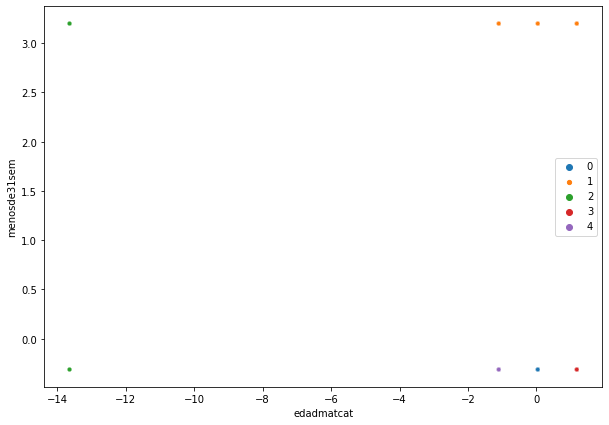

Evaluando: menosde1001  vs.  edadmatcat con 7 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= data[i].replace("#NULL!", "-10")
<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

El coefficiente es: 0.999926570201585
Tipo de dato: <class 'numpy.ndarray'>


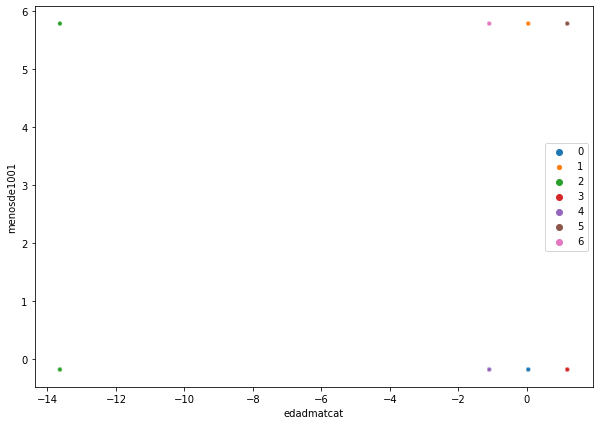

Evaluando: MUERTE1ANO  vs.  edadmatcat con 7 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= data[i].replace("#NULL!", "-10")
<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

El coefficiente es: 0.9985529008789539
Tipo de dato: <class 'numpy.ndarray'>


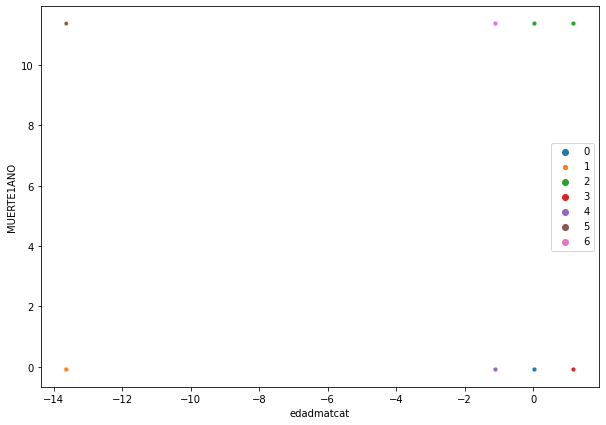

Evaluando: menosde31sem  vs.  ERN_Sexo con 7 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= data[i].replace("#NULL!", "-10")
<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

El coefficiente es: 0.9999932801774247
Tipo de dato: <class 'numpy.ndarray'>


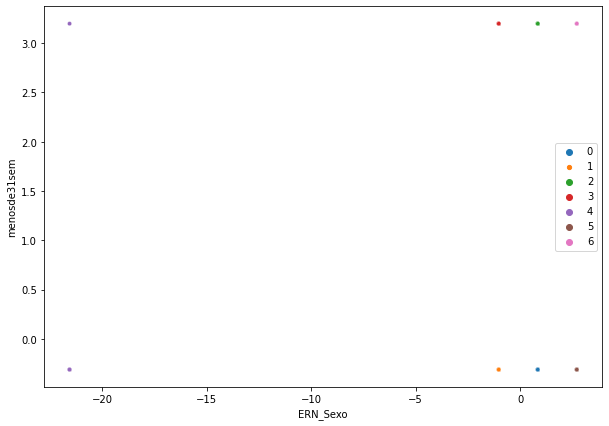

Evaluando: menosde1001  vs.  ERN_Sexo con 7 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= data[i].replace("#NULL!", "-10")
<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

El coefficiente es: 0.9999803203841461
Tipo de dato: <class 'numpy.ndarray'>


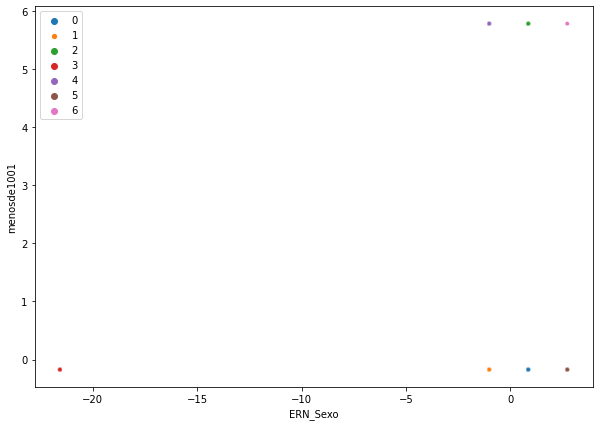

Evaluando: menosde1001  vs.  menosde31sem con 7 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[0]] = data[cols[0]].astype(float)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


El coefficiente es: 1.0
Tipo de dato: <class 'numpy.ndarray'>


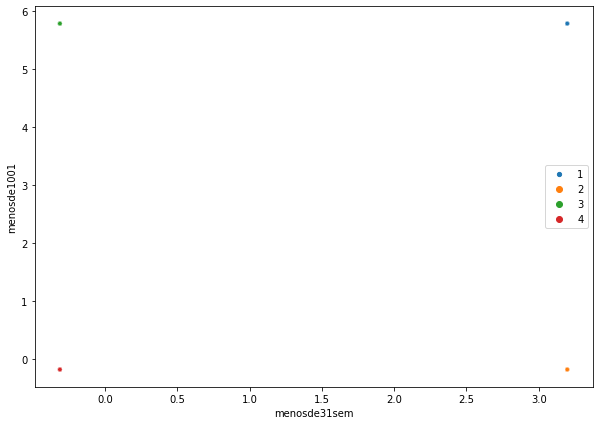

Evaluando: V196D  vs.  EGentradaPMC con 3 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= data[i].replace("#NULL!", "-10")
<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

El coefficiente es: 0.7284359433159251
Tipo de dato: <class 'numpy.ndarray'>


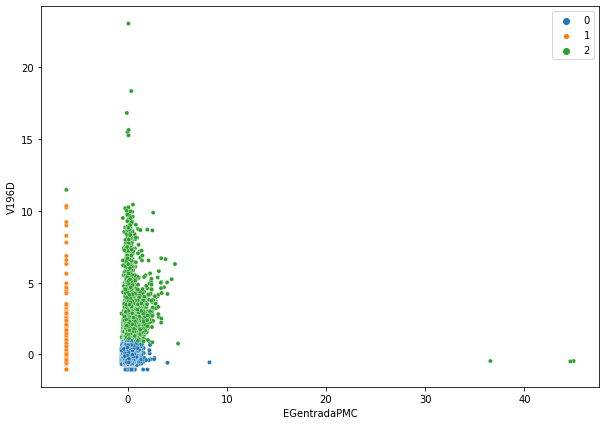

Evaluando: V196D  vs.  MUERTE1ANO con 7 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= data[i].replace("#NULL!", "-10")
<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

El coefficiente es: 0.6344774285028695
Tipo de dato: <class 'numpy.ndarray'>


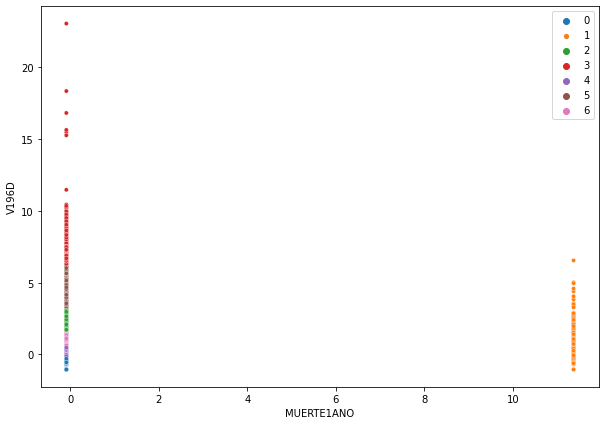

Evaluando: EGentradaPMC  vs.  MUERTE1ANO con 3 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= data[i].replace("#NULL!", "-10")
<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

El coefficiente es: 0.9555098974016688
Tipo de dato: <class 'numpy.ndarray'>


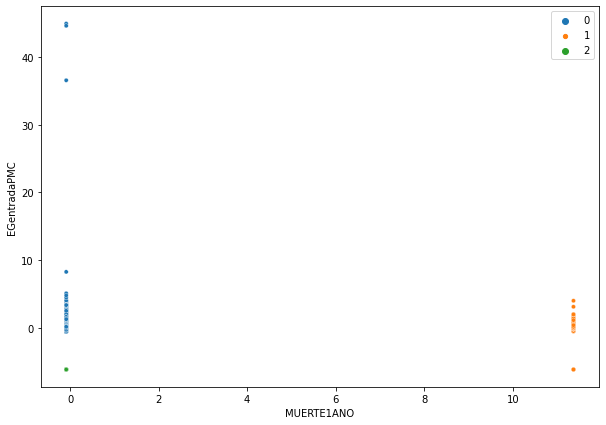

Evaluando: MUERTE1ANO  vs.  menosde1001 con 7 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[0]] = data[cols[0]].astype(float)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


El coefficiente es: 1.0
Tipo de dato: <class 'numpy.ndarray'>


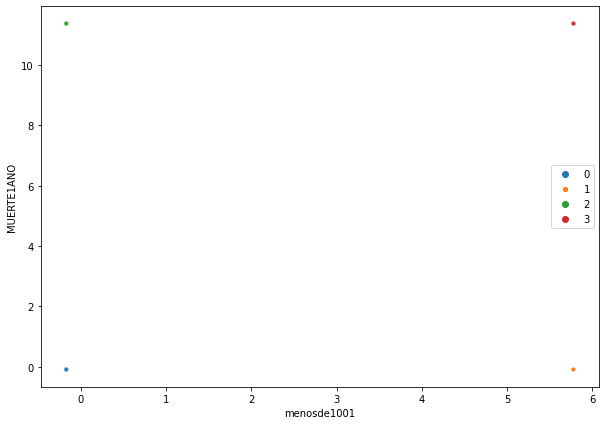

Evaluando: V196A  vs.  menosde31sem con 5 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= data[i].replace("#NULL!", "-10")
<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

El coefficiente es: 0.5405194737336736
Tipo de dato: <class 'numpy.ndarray'>


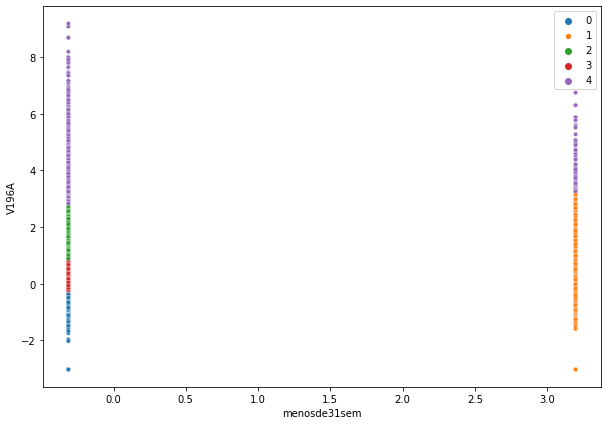

Evaluando: MUERTE1ANO  vs.  menosde31sem con 7 clusters
DataPre, 50814
DataPost, 50814


<ipython-input-223-02057a8febce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[1]] = data[cols[1]].astype(float)
<ipython-input-223-02057a8febce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[0]] = data[cols[0]].astype(float)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


El coefficiente es: 1.0
Tipo de dato: <class 'numpy.ndarray'>


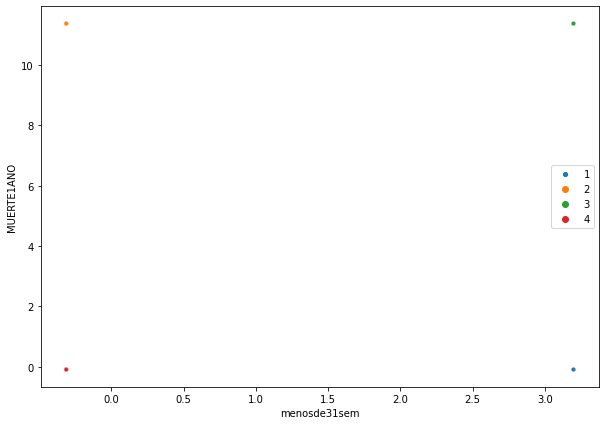

In [224]:
predictions = []
centroids = []
for d in clustersAFormar:
  pred, cent = clusters(d)
  predictions.append(pred)
  centroids.append(cent)

In [209]:
vals = []
for p in predictions[0]:
  if p not in vals:
    vals.append(p)
print(vals)

[0, 3, 1, 4, 2]


In [212]:
columns = []
for c in clustersAFormar:
  cols = c[1]
  s = cols[0] + " vs " + cols[1]
  columns.append(s)

In [217]:
outDataframe = pd.DataFrame(index = raw_data.index)

In [233]:
testDF = outDataframe
count = 0
for c in columns:
  testDF[c] = predictions[count]
  count+=1


In [234]:
testDF

,edadmatcat vs menosde31sem,edadmatcat vs menosde1001,edadmatcat vs MUERTE1ANO,ERN_Sexo vs menosde31sem,ERN_Sexo vs menosde1001,menosde31sem vs menosde1001,EGentradaPMC vs V196D,MUERTE1ANO vs V196D,MUERTE1ANO vs EGentradaPMC,menosde1001 vs MUERTE1ANO,menosde31sem vs V196A,menosde31sem vs MUERTE1ANO
@_id,,,,,,,,,,,,
5cffe82470812e22d4306904,0,0,0,1,1,4,0,0,0,0,0,4
5cffe82470812e22d4306905,0,0,0,0,0,4,0,4,0,0,3,4
5cffe82470812e22d4306906,3,3,3,1,1,4,0,4,0,0,0,4
5cffe82470812e22d4306907,1,0,0,3,1,2,0,6,0,0,1,1
5cffe82470812e22d4306908,3,5,3,0,2,3,2,6,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
61d2f0f8f7ea600337049066,1,0,0,3,1,2,0,6,0,0,1,1
624446e11e3c3e64f4518cd9,0,0,0,0,0,4,0,0,0,0,3,4
6232121e0b58118926493f38,1,0,0,2,0,2,0,4,0,0,1,1


In [235]:
testDF.to_csv('clusterInfo.csv', encoding = 'utf-8-sig')
files.download('clusterInfo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [227]:
len(centroids)

12

In [228]:
centroids[0]

array([[  0.03956327,  -0.31273445],
       [  0.0855134 ,   3.19760099],
       [-13.63640795,  -0.04895202],
       [  1.17922753,  -0.31273445],
       [ -1.100101  ,  -0.31273445]])

In [229]:
cDF = pd.DataFrame(index = columns)
cDF

""
edadmatcat vs menosde31sem
edadmatcat vs menosde1001
edadmatcat vs MUERTE1ANO
ERN_Sexo vs menosde31sem
ERN_Sexo vs menosde1001
menosde31sem vs menosde1001
EGentradaPMC vs V196D
MUERTE1ANO vs V196D
MUERTE1ANO vs EGentradaPMC
menosde1001 vs MUERTE1ANO


In [230]:
cDF['Centroids'] = centroids

In [231]:
cDF

,Centroids
edadmatcat vs menosde31sem,"[[0.03956326542682113, -0.31273445414604734], ..."
edadmatcat vs menosde1001,"[[0.03956326542682315, -0.17308333286821181], ..."
edadmatcat vs MUERTE1ANO,"[[0.039563265426823875, -0.08794550690438474],..."
ERN_Sexo vs menosde31sem,"[[0.8528417583911417, -0.312734454145978], [-1..."
ERN_Sexo vs menosde1001,"[[0.8528417583911418, -0.17308333286816435], [..."
menosde31sem vs menosde1001,"[[-0.3127344541461241, -0.1730833328682471], [..."
EGentradaPMC vs V196D,"[[0.10560697766841669, -0.2515453769530141], [..."
MUERTE1ANO vs V196D,"[[-0.08794550690438742, -0.48301348501276353],..."
MUERTE1ANO vs EGentradaPMC,"[[-0.08794550690438013, 0.1302094344756322], [..."
menosde1001 vs MUERTE1ANO,"[[-0.17308333286825373, -0.08794550690438023],..."


In [232]:
cDF.to_csv('centroids.csv', encoding = 'utf-8-sig')
files.download('centroids.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [236]:
short_data = pd.read_csv('./drive/MyDrive/data_short.csv',index_col=0)

In [238]:
short_data.shape

(5, 674)

In [240]:
raw_data[columns] = testDF[columns]

In [241]:
raw_data

,Code,Iden_Codigo,Iden_Sede,Iden_embarazoMultiple,Iden_EstadoHC,Iden_FechaParto,CSP_CiudadProcedencia,CSP_SituaPareja,CSP_TipoVivienda,CSP_EscolaridadMadre,CSP_SituacionLaboralMadre,CSP_FechaNacimientoMadre,CSP_EscolaridadPadre,CSP_SituacionLaboralPadre,CSP_IngresoMensual,CSP_DistanciaVivienda,CSP_numPersVivenIngMen,CSP_Menores5vivenMadre,CSP_NutricionFam,CSP_EmbarazoDeseado,CSP_MesTabajoEmba,CSP_AyudaPerm1mes,CSP_OtrasObservaciones,CP_PesoMadre,CP_TallaMadre,CP_PesoPadre,CP_TallaPadre,CP_Gestacion,CP_Paridad,CP_PartoCesarea,CP_Ectopico,CP_NacidoVivo,CP_Prematuro,CP_Mortinato,CP_TotalCPN,CP_ARO,CP_EnfermeraJefe,CP_MedGeneral,CP_Hormonales,CP_DIU,CP_MesInicCP,CP_SA_Sangrado,CP_SA_InfUrinaria,CP_SA_InfGineco,CP_SA_Anemia,CP_SA_EnfRespiratoria,CP_SA_RPM,CP_SA_APP,CP_SA_Preclampsia,CP_EstuvoHosp,CP_HospitalizacionesPreParto,CP_rhMadre,CP_MadreAlcohol,CP_MadreDrogas,CP_MadreFumo,CP_HospitalizacionEmbarazoAccidentes,CP_HospitalizacionEmbarazoAnemia,CP_HospitalizacionEmbarazoEnfermedadRespiratoria,CP_HospitalizacionEmbarazoAPP,CP_HospitalizacionEmbarazoPreeclampsia,CP_HospitalizacionEmbarazoEclampsia,CP_HospitalizacionEmbarazoInfeccionGinecologica,CP_HospitalizacionEmbarazoInfeccionUrinaria,CP_HospitalizacionEmbarazoSangrado,CP_TP_Orina,CP_TP_Rubeola,CP_TP_Toxoplasmosis,CP_TP_Sifilis,CP_TP_HIV,CP_TP_HepatitisB,CP_Medicamentos,CP_NumEcografias,CP_EcoPrimerTrimestre,CP_edadmaterna,PA_LugarNacimiento,PA_DuracionRPM,PA_AtendioParto,PA_DuracionTraParto,PA_TipoParto,PA_PresentacionNino,PA_MovimientoDisminuido,PA_SufrimientoFetalAgudo,PA_LiqAmnioticoMeconiado,PA_RitmoCardiaco,PA_Monitoreo,SFA,PA_NumDosisCorticoides,PA_ComplicacionsPartoPlacentaPrevia,PA_ComplicacionsPartoAbrupcio,PA_ComplicacionsPartoMultiples,PA_ComplicacionsPartoPatologIaCordOn,PA_ComplicacionsPartoPreeclampsia,PA_ComplicacionsPartoEclampsia,PA_ComplicacionsPartoAmnionitis,PA_ComplicacionsPartoSindromedehellp,PA_DiasHospiMadre,PA_DiasUCIMadre,PA_EstActualMadre,ERN_AdaptNeonatal,ERN_Peso,ERN_Talla,ERN_Sexo,ERN_PC,ERN_FUM,ERN_Ballard,ERN_Eco,ERN_LubchencoFenton,ERN_A_1min,ERN_A_5min,ERN_A_10min,ERN_Remision,HD_FechaEntrada,HD_FechaSalida,HD_DiasVenMecanica,HD_DiasVenNoInvasiva,HD_DiasOxigeno,HD_DiasCanulaNasa,HD_DiasFototerapia,HD_DiasCamaraCefalica,HD_DiasIncubadora,HD_DiasAlimentacionPar,HD_DiasUCI,HD_DiasURN,HD_DiasAlojamiento,HD_TotalDiasHospital,HD_ExamenesEcografiacerebral,HD_ExamenesEcocardiograma,,HD_ExamenesRubeola,HD_ExamenesToxoplasmosis,HD_ExamenesSifilis,HD_ExamenesHIV,HD_ExamenesHepatitisB,HD_ExamenesGenetico,HD_ExamenesRMICerebral,HD_ExamenesTSH_Tiroides,HD_DosisSurfactante,HD_CicloAntibio,HD_DosisAmino,HD_CiclosUltimaLinea,HD_CiclosOtroAntibio,HD_SosInfec,HD_RhNino,HD_NumTrasSanguineas,HD_FechaUltimaTrans,HD_UltiValorHematocrito,HD_UltimValorHemaglobina,HD_ValorMasAltoBilirubina,HD_C_HemorragiaIntra,HD_C_Hipoglicemia,HD_C_Apnea,HD_C_Ictericia,HD_C_ExamenNeurologico,HD_C_Convulsiones,HD_C_DisplasiaBronco,HD_C_OxigenoDependencia,HD_PesoSalida,HD_TipoAlimentacionS,AC_LugarAC,AC_DiasPosCanguro,AC_MaxHorasLogroCargar,AC_UCI_PesEntrada,AC_UCI_PesSalida,AC_URN_PesEntrada,AC_URN_PesSalida,AC_AlojCon_PesEntrada,AC_AlojCon_PesSalida,AC_AdapSeno,AC_ExtraSeno,AC_AdmGoteo,AC_UnidadAbierta,AC_MadreAmamanta,AC_CansaNinoChupando,AC_EntrenoOtroCuidador,AC_RecibioChupo,AC_CirujiaSeno,AC_SoportePosicionC,AC_ApoyoLactancia,AC_EnsePosCangu,AC_SillaIncubadora,V7,V8,V9,V10,V10D,V10A,V10B,V10C,ANOCAT,ANO,educmadresimplificada,educpadresimplificada,ERN_sepsis,ERN_EGBallard,RCIUFenton,HD_C_GradoHIV,CE_Riesgo,percapita,Sufrimientofetalcronico,tuvotransfusiones,edadmatcat,toxemia,ecocat,apgarcat1,apgarcat5,pesocat,gestacat,ninosmenosde5anos,UCI,ALIMENTAPARENTERAL,INFECCIONOSOCOMIAL,cesarea,BPN,PESO1500G,EGentradaPMC,altoriesgo,V195B,Nearterm,controlcat,pdpcat,primipara,trimestre,anemiamadre,HD_Infecciones,recibioantibioticos,RELACIONAROSOBRETOTALCONSULTAS,AROCAT02,anoxia5mn,problemaneurologico,menosde31sem,menosde1001,tipoventilacion,ventilacionsola,cpapsola,ventilacionmixta,UCIsinsopo

In [242]:
raw_data.to_csv('clusterInfoFull.csv', encoding = 'utf-8-sig')
files.download('clusterInfoFull.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>